# STAT 557: Project 4 - Mixture Discriminant Analysis 

By: Rakshith Badarinath

Date: 11/27/2017

The aim of this project is to practice the EM algorithm for estimating mixture models and its application in classification. 

Requirements for the project are listed below:
1.  Implement the EM algorithm for estimating a mixture of normals.
2.  Use mixture discriminant analysis for classification.  Try different numbers of components in the mixture distributions. 
3. Compare MDA with QDA. (quadratic discriminant analysis).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

%matplotlib inline

## About Wine Data

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars.
The analysis determined the quantities of 13 constituents found in each of the three types of wines. 
-- The attributes are (dontated by Riccardo Leardi, riclea@anchem.unige.it)
1. Alcohol
2. Malic acid
3. Ash
4. Alcalinity of ash 
5. Magnesium
6. Total phenols
7. Flavanoids
8. Nonflavanoid phenols
9. Proanthocyanins
10. Color intensity
11. Hue
12. OD280/OD315 of diluted wines
13. Proline 

Number of Instances:
1. class 1: 59
2. class 2: 71
3. class 3: 48

Total number of samples: 178

Number of Attributes: 13

All attributes are continuous

Missing Attribute Values: None

## Import Data


In [2]:
from sklearn.datasets import load_wine 

X, y = load_wine(return_X_y=True)
feature_names=['Alcohol', 'Malic Acid','Ash', 'Alcalinity of ash','Magnesium','Total Phenols','Flavanoids', 'Non-Flavanoid Phenols','Proanthocyanins','Color Intensity','Hue','OD280/OD315 of diluted wines','Proline']
target_names=['class 0', 'class 1', 'class 2']
class_label = ['Class Label']

# create table for representation
data = pd.DataFrame(data=X, columns=feature_names)
wine_data = data.assign(class_label=y) #add new column for class label
#wine_data['Class Label'] = y # Option-2

X_wine = wine_data[['Alcohol', 'Malic Acid','Ash', 'Alcalinity of ash','Magnesium','Total Phenols','Flavanoids', 'Non-Flavanoid Phenols','Proanthocyanins','Color Intensity','Hue','OD280/OD315 of diluted wines','Proline']]
y_wine = wine_data['class_label']

In [3]:
# Display Wine Data
wine_data

,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total Phenols,Flavanoids,Non-Flavanoid Phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of diluted wines,Proline,class_label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735.0,0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450.0,0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290.0,0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295.0,0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045.0,0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045.0,0


## Initial Exploratory Data Analysis

### Feature Pair Plot


In [4]:
# # Plotting a Pair plot scatter matrix - Pndas Scatter Matrix
# from matplotlib import cm
# from pandas.plotting import scatter_matrix

# X_wine = wine_data[['Alcohol', 'Malic Acid','Ash', 'Alcalinity of ash','Magnesium','Total Phenols','Flavanoids', 'Non-Flavanoid Phenols','Proanthocyanins','Color Intensity','Hue','OD280/OD315 of diluted wines','Proline']]
# y_wine = wine_data['class_label']
# fig = plt.figure()
# cmap = cm.get_cmap('gnuplot')
# scatter = scatter_matrix(X_wine, c=y_wine, marker='o', s=40, hist_kwds={'bins':15}, figsize=(30,30), cmap=cmap)

# # Plotting a Pair plot scatter matrix - Seaborn Pairplot Scatter Matrix
# sn.set(style="ticks", color_codes=True) # change style

# sn.pairplot(wine_data, hue="class_label")
# plt.show()

### Correlation Matrix

In [5]:
# sn.set(style="white")

# # Compute the correlation matrix
# corr = X_wine.corr()

# # Generate a mask for the upper triangle
# mask = np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

# # Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(11, 9))

# # Generate a custom diverging colormap
# cmap = sn.diverging_palette(220, 10, as_cmap=True)

# # Draw the heatmap with the mask and correct aspect ratio
# sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5})
# plt.show()

## Gaussian Mixture Models

A Gaussian mixture model is a probabilistic model that assumes all the data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters. One can think of mixture models as generalizing k-means clustering to incorporate information about the covariance structure of the data as well as the centers of the latent Gaussians.

The GaussianMixture object implements the expectation-maximization (EM) algorithm for fitting mixture-of-Gaussian models. It can also draw confidence ellipsoids for multivariate models, and compute the Bayesian Information Criterion to assess the number of clusters in the data. A GaussianMixture.fit method is provided that learns a Gaussian Mixture Model from train data. Given test data, it can assign to each sample the Gaussian it mostly probably belong to using the GaussianMixture.predict method.
The GaussianMixture comes with different options to constrain the covariance of the difference classes estimated: spherical, diagonal, tied or full covariance.

In [6]:
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold
import matplotlib as mpl

## Gaussian Mixture - EM Algorithm

### Split the data into Test and Train sets (Stratified K Fold Split)

In [7]:
# Break up the dataset into non-overlapping training (75%) and testing (25%) sets.
# Stratified k-fold preserves the class proportion in each fold
skf = StratifiedKFold(n_splits=4)
# Only take the first fold.
train_index, test_index = next(iter(skf.split(X, y)))

X_train = X[train_index]
y_train = y[train_index]
X_test = X[test_index]
y_test = y[test_index]

n_classes = len(np.unique(y_train))

In [8]:
n_classes

3

## GMM - EM Algorithm

In [9]:
gmm = GaussianMixture(n_components=n_classes).fit(X_train,y_train)
y_train_pred = gmm.predict(X_train)
y_test_pred = gmm.predict(X_test)

print('Accuracy of GMM classifier on training set: {:.2f}'
     .format(np.mean(y_train_pred.ravel() == y_train.ravel())*100))
print('Accuracy of GMM classifier on test set: {:.2f}'
     .format(np.mean(y_test_pred.ravel() == y_test.ravel())*100))

Accuracy of GMM classifier on training set: 20.30
Accuracy of GMM classifier on test set: 13.33


### AIC and BIC Metrics

In [10]:
print(gmm.bic(X_wine))
print(gmm.aic(X_wine))

7976.59266705
6977.51263225


### Classification Accuracy - Confusion Matrix

Text(0.5,15,'Predicted label')

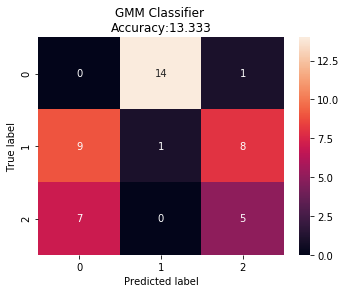

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score

confusion_mc = confusion_matrix(y_test, y_test_pred)
df_cm = pd.DataFrame(confusion_mc, 
                     index = [i for i in range(0,3)], columns = [i for i in range(0,3)])

plt.figure(figsize=(5.5,4))
sn.heatmap(df_cm, annot=True)
plt.title('GMM Classifier \nAccuracy:{0:.3f}'.format(np.mean(y_test_pred.ravel() == y_test.ravel())*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')

### Effect of Varying Number of Components on Train and Test Accuracy

In [12]:
n_components = range(1,8)

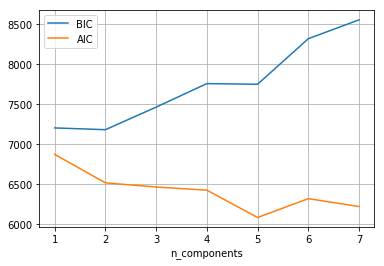

In [13]:
models = [GaussianMixture(n,random_state=0).fit(X_wine) for n in n_components]

plt.plot(n_components, [m.bic(X_wine) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X_wine) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.grid()

### How Different Covariances in GMM Affect Test and Train Accuracy

### Covariance Types

'full' (each component has its own general covariance matrix) --- DEFAULT

'tied' (all components share the same general covariance matrix),

'diag' (each component has its own diagonal covariance matrix),

'spherical' (each component has its own single variance).

In [14]:
# Try GMMs using different types of covariances.
estimators = dict((cov_type, GaussianMixture(n_components=n_classes,
                   covariance_type=cov_type, max_iter=20, random_state=0))
                  for cov_type in ['spherical', 'diag', 'tied', 'full'])

n_estimators = len(estimators)

In [15]:
estimators

{'diag': GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=20,
         means_init=None, n_components=3, n_init=1, precisions_init=None,
         random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
         verbose_interval=10, warm_start=False, weights_init=None),
 'full': GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=20,
         means_init=None, n_components=3, n_init=1, precisions_init=None,
         random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
         verbose_interval=10, warm_start=False, weights_init=None),
 'spherical': GaussianMixture(covariance_type='spherical', init_params='kmeans',
         max_iter=20, means_init=None, n_components=3, n_init=1,
         precisions_init=None, random_state=0, reg_covar=1e-06, tol=0.001,
         verbose=0, verbose_interval=10, warm_start=False,
         weights_init=None),
 'tied': GaussianMixture(covariance_type='tied', init_params='kmeans', max_iter=20,
         means_init=None, n

### Function to Plot Ellipses

In [16]:
def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)

### Plot Results 

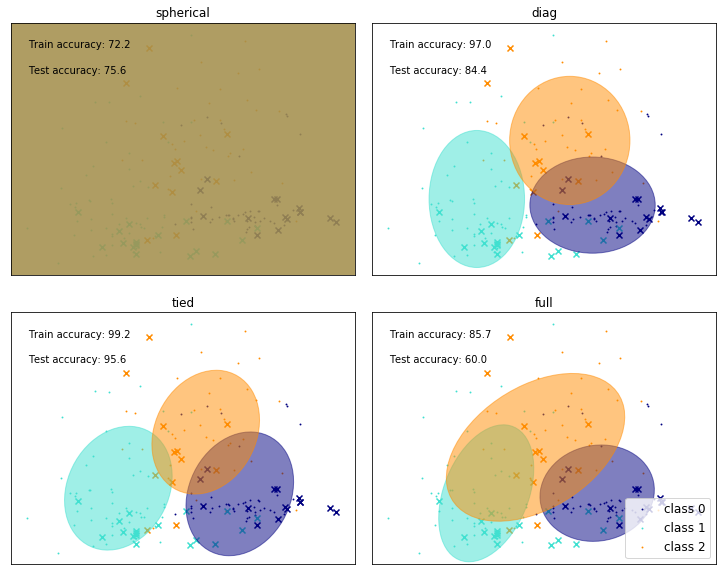

In [17]:
colors = ['navy', 'turquoise', 'darkorange'] # Three colors for three classes

plt.figure(figsize=(5 * n_estimators // 2, 8))
plt.subplots_adjust(bottom=.01, top=0.95, hspace=.15, wspace=.05, left=.01, right=.99)

for index, (name, estimator) in enumerate(estimators.items()):
    # Since we have class labels for the training data, we can initialize the GMM parameters in a supervised manner.
    estimator.means_init = np.array([X_train[y_train == i].mean(axis=0)
                                    for i in range(n_classes)])

    # Train the other parameters using the EM algorithm.
    estimator.fit(X_train,y_train)

    h = plt.subplot(2, n_estimators // 2, index + 1)
    make_ellipses(estimator, h)

    for n, color in enumerate(colors):
        data = X[y == n]
        plt.scatter(data[:, 0], data[:, 1], s=0.8, color=color,
                    label=target_names[n])
    # Plot the test data with crosses
    for n, color in enumerate(colors):
        data = X_test[y_test == n]
        plt.scatter(data[:, 0], data[:, 1], marker='x', color=color)

    y_train_pred = estimator.predict(X_train)
    train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
    plt.text(0.05, 0.9, 'Train accuracy: %.1f' % train_accuracy,
             transform=h.transAxes)

    y_test_pred = estimator.predict(X_test)
    test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
    plt.text(0.05, 0.8, 'Test accuracy: %.1f' % test_accuracy,
             transform=h.transAxes)

    plt.xticks(())
    plt.yticks(())
    plt.title(name)

plt.legend(scatterpoints=1, loc='lower right', prop=dict(size=12))


plt.show()

## Selecting # of Components based on BIC Score

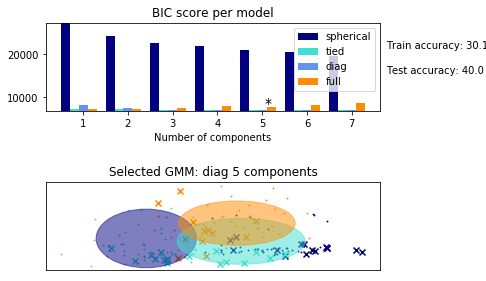

In [18]:
import itertools
from scipy import linalg


lowest_bic = np.infty
bic = []
n_components_range = range(1, 8)
cv_types = ['spherical', 'tied', 'diag', 'full']

for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(X_wine)
        bic.append(gmm.bic(X_wine))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue', 'darkorange'])
clf = best_gmm
bars = []

# Plot the BIC scores
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)], width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)

# # Plot the winner
splot = plt.subplot(2, 1, 2)
clf.fit(X_train,y_train)
make_ellipses(clf, splot)

for n, color in enumerate(colors):
    data = X[y == n]
    plt.scatter(data[:, 0], data[:, 1], s=0.8, color=color, label=target_names[n])
    
# Plot the test data with crosses
for n, color in enumerate(colors):
    data = X_test[y_test == n]
    plt.scatter(data[:, 0], data[:, 1], marker='x', color=color)
    
y_train_pred = clf.predict(X_train)
train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
plt.text(0.05, 0.9, 'Train accuracy: %.1f' % train_accuracy, transform=h.transAxes)

y_test_pred = clf.predict(X_test)
test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
plt.text(0.05, 0.8, 'Test accuracy: %.1f' % test_accuracy, transform=h.transAxes)    

plt.xticks(())
plt.yticks(())
plt.title('Selected GMM: ' + clf.covariance_type + ' ' + str(clf.n_components) + ' components')
plt.subplots_adjust(hspace=.8, bottom=.02)
plt.show()

## Comparing MDA with QDA

In [19]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

In [20]:
qda = QDA(store_covariance='True')
x_qda = qda.fit(X_train,y_train)

In [21]:
# Prediction using QDA
y_pred_qda = qda.predict(X_test)
print('Wine dataset')
print('Accuracy of QDA classifier on training set: {:.2f}'
     .format(qda.score(X_train, y_train)))
print('Accuracy of QDA classifier on test set: {:.2f}'
     .format(qda.score(X_test, y_test)))

Wine dataset
Accuracy of QDA classifier on training set: 1.00
Accuracy of QDA classifier on test set: 0.96
